In [1]:
import pandas as pd
import numpy as np
import os

from matplotlib.pyplot import *
from matplotlib import pyplot as plt 

rcParams['mathtext.rm'] = "Arial"
rcParams['font.family'] = 'Arial'

In [2]:
path = "./experiment_results/"
files = os.listdir(path)
files = sorted(files, key=lambda x: int(x.replace('run', '').replace(".xlsx","")))
X_datas = []
Y_datas = []
for file in files:
    if file.endswith(".xlsx"):
        full_path = os.path.join(path, file)
        X_datas.append(pd.read_excel(full_path, usecols=["H2O", "Gd(ClO4)3", "Ni-NMIDA", "NaOH", "UREA"]))
        Y_datas.append(pd.read_excel(full_path, usecols=["Crystal"]))

In [3]:
X = pd.concat(X_datas)
Y = pd.concat(Y_datas)
X = np.array(X)
Y = np.array(Y, dtype = bool)
Y = Y.T[0]

unique_rows, unique_indexes = np.unique(X, axis=0, return_index=True)
print(len(X))
print(len(unique_rows))
X = X[unique_indexes]
y = Y[unique_indexes]

_X_all = X.copy()
_y_all = y.copy()

780
780


In [4]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state = 42)
X_train_real, X_val, y_train_real, y_val = train_test_split(X_train, y_train,test_size=0.2,random_state = 42)

print(len(X_train_real))
print(len(X_val))
print(len(X_test))


clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_real, X_val, y_train_real, y_val)

display(models)

499
125
156


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.94it/s]

[LightGBM] [Info] Number of positive: 112, number of negative: 387
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.224449 -> initscore=-1.239926
[LightGBM] [Info] Start training from score -1.239926
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.74,0.80,0.80,0.76,0.06
XGBClassifier,0.88,0.80,0.80,0.88,0.05
LGBMClassifier,0.87,0.79,0.79,0.87,0.17
BaggingClassifier,0.86,0.79,0.79,0.87,0.03
AdaBoostClassifier,0.86,0.77,0.77,0.86,0.08
ExtraTreesClassifier,0.88,0.77,0.77,0.87,0.12
KNeighborsClassifier,0.84,0.76,0.76,0.84,0.01
LabelSpreading,0.82,0.74,0.74,0.82,0.01
LabelPropagation,0.81,0.74,0.74,0.82,0.01


In [5]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

for model_name in models.index:
    value = clf.models[model_name]
    y_pred = value.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(model_name)
    
    print(f'Accuracy: {accuracy:.3f}')
    print(f'Balanced Accuracy: {balanced_accuracy:.3f}')
    print(f'F1 Score: {f1:.3f}')

NearestCentroid
Accuracy: 0.647
Balanced Accuracy: 0.741
F1 Score: 0.672
XGBClassifier
Accuracy: 0.872
Balanced Accuracy: 0.841
F1 Score: 0.874
LGBMClassifier
Accuracy: 0.865
Balanced Accuracy: 0.828
F1 Score: 0.867
BaggingClassifier
Accuracy: 0.853
Balanced Accuracy: 0.820
F1 Score: 0.856
AdaBoostClassifier
Accuracy: 0.821
Balanced Accuracy: 0.780
F1 Score: 0.825
ExtraTreesClassifier
Accuracy: 0.859
Balanced Accuracy: 0.805
F1 Score: 0.859
KNeighborsClassifier
Accuracy: 0.872
Balanced Accuracy: 0.832
F1 Score: 0.873
LabelSpreading
Accuracy: 0.795
Balanced Accuracy: 0.782
F1 Score: 0.805
LabelPropagation
Accuracy: 0.788
Balanced Accuracy: 0.778
F1 Score: 0.799
LogisticRegression
Accuracy: 0.788
Balanced Accuracy: 0.647
F1 Score: 0.771
GaussianNB
Accuracy: 0.750
Balanced Accuracy: 0.706
F1 Score: 0.760
BernoulliNB
Accuracy: 0.756
Balanced Accuracy: 0.691
F1 Score: 0.762
RandomForestClassifier
Accuracy: 0.885
Balanced Accuracy: 0.813
F1 Score: 0.881
DecisionTreeClassifier
Accuracy: 0.769

In [7]:
from sklearn.metrics import roc_auc_score

all_performance = []
test_performance = []


for i in range(1, len(X_datas) + 1):

    for random_state in range(42, 58):
        print(i)
        print(20*"=")
        if i >0:
            X = pd.concat(X_datas[0:i])
            Y = pd.concat(Y_datas[0:i])

        else:
            X = X_datas[0]
            Y = Y_datas[0]

        X = np.array(X)
        Y = np.array(Y, dtype = bool)
        Y = Y.T[0]

        unique_rows, unique_indexes = np.unique(X, axis=0, return_index=True)
        
        print(len(X))
        print(len(unique_rows))
        
        X = X[unique_indexes]
        y = Y[unique_indexes]

        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = random_state)
        X_train_real, X_val, y_train_real, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = random_state)

        print(len(X_train_real))
        print(len(X_val))
        print(len(X_test))

        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
        models, predictions = clf.fit(X_train_real, X_val, y_train_real, y_val)
        # display(models)
        
        value = clf.models["LabelSpreading"]

        # predict test set 
        y_pred = value.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        auc = roc_auc_score(y_test, value.predict_proba(X_test)[:,1])

        print(f'Accuracy: {accuracy:.3f}')
        print(f'Balanced Accuracy: {balanced_accuracy:.3f}')
        print(f'F1 Score: {f1:.3f}')

        test_performance.append([accuracy, balanced_accuracy, f1, auc])

        valid_index = []
        for _index in range(len(_X_all)):
            if (_X_all[_index] == (X_train_real)).all(axis = 1).any():
                pass 
            else:
                valid_index.append(_index)
            

        # predict the whole set 
        y_pred = value.predict(_X_all[valid_index])
        accuracy = accuracy_score(_y_all[valid_index], y_pred)
        balanced_accuracy = balanced_accuracy_score(_y_all[valid_index], y_pred)
        f1 = f1_score(_y_all[valid_index], y_pred, average='weighted')
        auc = roc_auc_score(_y_all[valid_index], value.predict_proba(_X_all[valid_index])[:,1])

        print(f'Accuracy: {accuracy:.3f}')
        print(f'Balanced Accuracy: {balanced_accuracy:.3f}')
        print(f'F1 Score: {f1:.3f}')
        all_performance.append([accuracy, balanced_accuracy, f1, auc])

1
500
500
320
80
100


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 41.67it/s]


[LightGBM] [Info] Number of positive: 96, number of negative: 224
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.300000 -> initscore=-0.847298
[LightGBM] [Info] Start training from score -0.847298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 41.11it/s]


[LightGBM] [Info] Number of positive: 86, number of negative: 234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.268750 -> initscore=-1.000974
[LightGBM] [Info] Start training from score -1.000974
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 40.34it/s]


[LightGBM] [Info] Number of positive: 82, number of negative: 238
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256250 -> initscore=-1.065551
[LightGBM] [Info] Start training from score -1.065551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.59it/s]


[LightGBM] [Info] Number of positive: 92, number of negative: 228
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.287500 -> initscore=-0.907557
[LightGBM] [Info] Start training from score -0.907557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 40.36it/s]


[LightGBM] [Info] Number of positive: 90, number of negative: 230
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.281250 -> initscore=-0.938270
[LightGBM] [Info] Start training from score -0.938270
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 40.80it/s]


[LightGBM] [Info] Number of positive: 91, number of negative: 229
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.284375 -> initscore=-0.922862
[LightGBM] [Info] Start training from score -0.922862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 41.90it/s]


[LightGBM] [Info] Number of positive: 81, number of negative: 239
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.253125 -> initscore=-1.082014
[LightGBM] [Info] Start training from score -1.082014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.48it/s]


[LightGBM] [Info] Number of positive: 91, number of negative: 229
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.284375 -> initscore=-0.922862
[LightGBM] [Info] Start training from score -0.922862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.33it/s]


[LightGBM] [Info] Number of positive: 93, number of negative: 227
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 374
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290625 -> initscore=-0.892351
[LightGBM] [Info] Start training from score -0.892351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.79it/s]


[LightGBM] [Info] Number of positive: 94, number of negative: 226
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.293750 -> initscore=-0.877240
[LightGBM] [Info] Start training from score -0.877240
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.13it/s]


[LightGBM] [Info] Number of positive: 89, number of negative: 231
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 374
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278125 -> initscore=-0.953781
[LightGBM] [Info] Start training from score -0.953781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.50it/s]


[LightGBM] [Info] Number of positive: 80, number of negative: 240
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.31it/s]


[LightGBM] [Info] Number of positive: 99, number of negative: 221
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.309375 -> initscore=-0.803043
[LightGBM] [Info] Start training from score -0.803043
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.03it/s]


[LightGBM] [Info] Number of positive: 85, number of negative: 235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265625 -> initscore=-1.016934
[LightGBM] [Info] Start training from score -1.016934
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.95it/s]


[LightGBM] [Info] Number of positive: 90, number of negative: 230
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 364
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.281250 -> initscore=-0.938270
[LightGBM] [Info] Start training from score -0.938270
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.14it/s]


[LightGBM] [Info] Number of positive: 87, number of negative: 233
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.271875 -> initscore=-0.985130
[LightGBM] [Info] Start training from score -0.985130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.62it/s]


[LightGBM] [Info] Number of positive: 96, number of negative: 288
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.64it/s]


[LightGBM] [Info] Number of positive: 104, number of negative: 280
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.270833 -> initscore=-0.990399
[LightGBM] [Info] Start training from score -0.990399
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.22it/s]


[LightGBM] [Info] Number of positive: 103, number of negative: 281
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 421
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.268229 -> initscore=-1.003626
[LightGBM] [Info] Start training from score -1.003626
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 40.28it/s]


[LightGBM] [Info] Number of positive: 101, number of negative: 283
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.263021 -> initscore=-1.030326
[LightGBM] [Info] Start training from score -1.030326
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.88it/s]


[LightGBM] [Info] Number of positive: 99, number of negative: 285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257812 -> initscore=-1.057369
[LightGBM] [Info] Start training from score -1.057369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.37it/s]


[LightGBM] [Info] Number of positive: 108, number of negative: 276
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.281250 -> initscore=-0.938270
[LightGBM] [Info] Start training from score -0.938270
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.59it/s]


[LightGBM] [Info] Number of positive: 103, number of negative: 281
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.268229 -> initscore=-1.003626
[LightGBM] [Info] Start training from score -1.003626
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.56it/s]


[LightGBM] [Info] Number of positive: 107, number of negative: 277
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278646 -> initscore=-0.951189
[LightGBM] [Info] Start training from score -0.951189
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.76it/s]


[LightGBM] [Info] Number of positive: 103, number of negative: 281
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.268229 -> initscore=-1.003626
[LightGBM] [Info] Start training from score -1.003626
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.61it/s]


[LightGBM] [Info] Number of positive: 101, number of negative: 283
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 421
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.263021 -> initscore=-1.030326
[LightGBM] [Info] Start training from score -1.030326
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.86it/s]


[LightGBM] [Info] Number of positive: 99, number of negative: 285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257812 -> initscore=-1.057369
[LightGBM] [Info] Start training from score -1.057369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.65it/s]


[LightGBM] [Info] Number of positive: 104, number of negative: 280
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.270833 -> initscore=-0.990399
[LightGBM] [Info] Start training from score -0.990399
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.64it/s]


[LightGBM] [Info] Number of positive: 86, number of negative: 298
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223958 -> initscore=-1.242746
[LightGBM] [Info] Start training from score -1.242746
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.98it/s]


[LightGBM] [Info] Number of positive: 91, number of negative: 293
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 421
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.236979 -> initscore=-1.169313
[LightGBM] [Info] Start training from score -1.169313
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.94it/s]


[LightGBM] [Info] Number of positive: 102, number of negative: 282
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265625 -> initscore=-1.016934
[LightGBM] [Info] Start training from score -1.016934
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.19it/s]


[LightGBM] [Info] Number of positive: 98, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.255208 -> initscore=-1.071024
[LightGBM] [Info] Start training from score -1.071024
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.71it/s]


[LightGBM] [Info] Number of positive: 103, number of negative: 293
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 396, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260101 -> initscore=-1.045444
[LightGBM] [Info] Start training from score -1.045444
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.62it/s]


[LightGBM] [Info] Number of positive: 103, number of negative: 293
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 396, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260101 -> initscore=-1.045444
[LightGBM] [Info] Start training from score -1.045444
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.90it/s]


[LightGBM] [Info] Number of positive: 93, number of negative: 303
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 437
[LightGBM] [Info] Number of data points in the train set: 396, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.234848 -> initscore=-1.181133
[LightGBM] [Info] Start training from score -1.181133
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.17it/s]


[LightGBM] [Info] Number of positive: 116, number of negative: 280
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 396, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.292929 -> initscore=-0.881199
[LightGBM] [Info] Start training from score -0.881199
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.72it/s]


[LightGBM] [Info] Number of positive: 94, number of negative: 302
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 396, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237374 -> initscore=-1.167132
[LightGBM] [Info] Start training from score -1.167132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.30it/s]


[LightGBM] [Info] Number of positive: 106, number of negative: 290
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 396, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267677 -> initscore=-1.006442
[LightGBM] [Info] Start training from score -1.006442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.15it/s]


[LightGBM] [Info] Number of positive: 97, number of negative: 299
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 436
[LightGBM] [Info] Number of data points in the train set: 396, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.244949 -> initscore=-1.125733
[LightGBM] [Info] Start training from score -1.125733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.72it/s]


[LightGBM] [Info] Number of positive: 103, number of negative: 293
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 396, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260101 -> initscore=-1.045444
[LightGBM] [Info] Start training from score -1.045444
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.34it/s]


[LightGBM] [Info] Number of positive: 98, number of negative: 298
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 396, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247475 -> initscore=-1.112126
[LightGBM] [Info] Start training from score -1.112126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.47it/s]


[LightGBM] [Info] Number of positive: 98, number of negative: 298
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 396, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247475 -> initscore=-1.112126
[LightGBM] [Info] Start training from score -1.112126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.50it/s]


[LightGBM] [Info] Number of positive: 109, number of negative: 287
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 396, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275253 -> initscore=-0.968134
[LightGBM] [Info] Start training from score -0.968134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.96it/s]


[LightGBM] [Info] Number of positive: 106, number of negative: 290
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 396, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267677 -> initscore=-1.006442
[LightGBM] [Info] Start training from score -1.006442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.76it/s]


[LightGBM] [Info] Number of positive: 96, number of negative: 300
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 396, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242424 -> initscore=-1.139434
[LightGBM] [Info] Start training from score -1.139434
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.79it/s]


[LightGBM] [Info] Number of positive: 101, number of negative: 295
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 396, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.255051 -> initscore=-1.071855
[LightGBM] [Info] Start training from score -1.071855
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.69it/s]


[LightGBM] [Info] Number of positive: 108, number of negative: 288
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 396, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.272727 -> initscore=-0.980829
[LightGBM] [Info] Start training from score -0.980829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.64it/s]


[LightGBM] [Info] Number of positive: 97, number of negative: 299
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 396, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.244949 -> initscore=-1.125733
[LightGBM] [Info] Start training from score -1.125733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.16it/s]


[LightGBM] [Info] Number of positive: 92, number of negative: 317
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 442
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.224939 -> initscore=-1.237113
[LightGBM] [Info] Start training from score -1.237113
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.54it/s]


[LightGBM] [Info] Number of positive: 99, number of negative: 310
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242054 -> initscore=-1.141452
[LightGBM] [Info] Start training from score -1.141452
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.06it/s]


[LightGBM] [Info] Number of positive: 91, number of negative: 318
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222494 -> initscore=-1.251192
[LightGBM] [Info] Start training from score -1.251192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.77it/s]


[LightGBM] [Info] Number of positive: 98, number of negative: 311
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.239609 -> initscore=-1.154825
[LightGBM] [Info] Start training from score -1.154825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.63it/s]


[LightGBM] [Info] Number of positive: 96, number of negative: 313
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.234719 -> initscore=-1.181855
[LightGBM] [Info] Start training from score -1.181855
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.83it/s]


[LightGBM] [Info] Number of positive: 105, number of negative: 304
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 447
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256724 -> initscore=-1.063067
[LightGBM] [Info] Start training from score -1.063067
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.14it/s]


[LightGBM] [Info] Number of positive: 108, number of negative: 301
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264059 -> initscore=-1.024979
[LightGBM] [Info] Start training from score -1.024979
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.99it/s]


[LightGBM] [Info] Number of positive: 101, number of negative: 308
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 443
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.246944 -> initscore=-1.114979
[LightGBM] [Info] Start training from score -1.114979
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.77it/s]


[LightGBM] [Info] Number of positive: 96, number of negative: 313
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 454
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.234719 -> initscore=-1.181855
[LightGBM] [Info] Start training from score -1.181855
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.53it/s]


[LightGBM] [Info] Number of positive: 102, number of negative: 307
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 446
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.249389 -> initscore=-1.101875
[LightGBM] [Info] Start training from score -1.101875
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.72it/s]


[LightGBM] [Info] Number of positive: 110, number of negative: 299
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 454
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.268949 -> initscore=-0.999963
[LightGBM] [Info] Start training from score -0.999963
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.46it/s]


[LightGBM] [Info] Number of positive: 112, number of negative: 297
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.273839 -> initscore=-0.975233
[LightGBM] [Info] Start training from score -0.975233
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.04it/s]


[LightGBM] [Info] Number of positive: 99, number of negative: 310
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242054 -> initscore=-1.141452
[LightGBM] [Info] Start training from score -1.141452
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.78it/s]


[LightGBM] [Info] Number of positive: 99, number of negative: 310
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242054 -> initscore=-1.141452
[LightGBM] [Info] Start training from score -1.141452
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.35it/s]


[LightGBM] [Info] Number of positive: 109, number of negative: 300
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266504 -> initscore=-1.012435
[LightGBM] [Info] Start training from score -1.012435
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.02it/s]


[LightGBM] [Info] Number of positive: 93, number of negative: 316
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.227384 -> initscore=-1.223143
[LightGBM] [Info] Start training from score -1.223143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.64it/s]


[LightGBM] [Info] Number of positive: 119, number of negative: 354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 486
[LightGBM] [Info] Number of data points in the train set: 473, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.251586 -> initscore=-1.090173
[LightGBM] [Info] Start training from score -1.090173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.22it/s]


[LightGBM] [Info] Number of positive: 97, number of negative: 376
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 490
[LightGBM] [Info] Number of data points in the train set: 473, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205074 -> initscore=-1.354878
[LightGBM] [Info] Start training from score -1.354878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.41it/s]


[LightGBM] [Info] Number of positive: 109, number of negative: 364
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 493
[LightGBM] [Info] Number of data points in the train set: 473, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230444 -> initscore=-1.205806
[LightGBM] [Info] Start training from score -1.205806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.09it/s]


[LightGBM] [Info] Number of positive: 114, number of negative: 359
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 492
[LightGBM] [Info] Number of data points in the train set: 473, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.241015 -> initscore=-1.147124
[LightGBM] [Info] Start training from score -1.147124
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.98it/s]


[LightGBM] [Info] Number of positive: 111, number of negative: 362
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 503
[LightGBM] [Info] Number of data points in the train set: 473, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.234672 -> initscore=-1.182114
[LightGBM] [Info] Start training from score -1.182114
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.45it/s]


[LightGBM] [Info] Number of positive: 107, number of negative: 366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 488
[LightGBM] [Info] Number of data points in the train set: 473, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226216 -> initscore=-1.229804
[LightGBM] [Info] Start training from score -1.229804
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.58it/s]


[LightGBM] [Info] Number of positive: 114, number of negative: 359
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 492
[LightGBM] [Info] Number of data points in the train set: 473, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.241015 -> initscore=-1.147124
[LightGBM] [Info] Start training from score -1.147124
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.96it/s]


[LightGBM] [Info] Number of positive: 111, number of negative: 362
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 486
[LightGBM] [Info] Number of data points in the train set: 473, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.234672 -> initscore=-1.182114
[LightGBM] [Info] Start training from score -1.182114
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.75it/s]


[LightGBM] [Info] Number of positive: 104, number of negative: 369
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 487
[LightGBM] [Info] Number of data points in the train set: 473, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219873 -> initscore=-1.266406
[LightGBM] [Info] Start training from score -1.266406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.72it/s]


[LightGBM] [Info] Number of positive: 114, number of negative: 359
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 495
[LightGBM] [Info] Number of data points in the train set: 473, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.241015 -> initscore=-1.147124
[LightGBM] [Info] Start training from score -1.147124
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


[LightGBM] [Info] Number of positive: 104, number of negative: 369
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 506
[LightGBM] [Info] Number of data points in the train set: 473, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219873 -> initscore=-1.266406
[LightGBM] [Info] Start training from score -1.266406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.51it/s]


[LightGBM] [Info] Number of positive: 109, number of negative: 364
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 493
[LightGBM] [Info] Number of data points in the train set: 473, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230444 -> initscore=-1.205806
[LightGBM] [Info] Start training from score -1.205806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.63it/s]


[LightGBM] [Info] Number of positive: 113, number of negative: 360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 502
[LightGBM] [Info] Number of data points in the train set: 473, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238901 -> initscore=-1.158716
[LightGBM] [Info] Start training from score -1.158716
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.76it/s]


[LightGBM] [Info] Number of positive: 106, number of negative: 367
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 493
[LightGBM] [Info] Number of data points in the train set: 473, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.224101 -> initscore=-1.241923
[LightGBM] [Info] Start training from score -1.241923
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.57it/s]


[LightGBM] [Info] Number of positive: 109, number of negative: 364
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 473, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230444 -> initscore=-1.205806
[LightGBM] [Info] Start training from score -1.205806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.24it/s]


[LightGBM] [Info] Number of positive: 113, number of negative: 360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 473, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238901 -> initscore=-1.158716
[LightGBM] [Info] Start training from score -1.158716
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.85it/s]


[LightGBM] [Info] Number of positive: 111, number of negative: 375
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 501
[LightGBM] [Info] Number of data points in the train set: 486, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.228395 -> initscore=-1.217396
[LightGBM] [Info] Start training from score -1.217396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.19it/s]


[LightGBM] [Info] Number of positive: 108, number of negative: 378
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 486, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222222 -> initscore=-1.252763
[LightGBM] [Info] Start training from score -1.252763
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.03it/s]


[LightGBM] [Info] Number of positive: 105, number of negative: 381
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 497
[LightGBM] [Info] Number of data points in the train set: 486, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216049 -> initscore=-1.288839
[LightGBM] [Info] Start training from score -1.288839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.76it/s]


[LightGBM] [Info] Number of positive: 112, number of negative: 374
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 503
[LightGBM] [Info] Number of data points in the train set: 486, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230453 -> initscore=-1.205757
[LightGBM] [Info] Start training from score -1.205757
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.61it/s]


[LightGBM] [Info] Number of positive: 109, number of negative: 377
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 499
[LightGBM] [Info] Number of data points in the train set: 486, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.224280 -> initscore=-1.240897
[LightGBM] [Info] Start training from score -1.240897
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.77it/s]


[LightGBM] [Info] Number of positive: 104, number of negative: 382
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 498
[LightGBM] [Info] Number of data points in the train set: 486, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.213992 -> initscore=-1.301030
[LightGBM] [Info] Start training from score -1.301030
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.55it/s]


[LightGBM] [Info] Number of positive: 108, number of negative: 378
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 494
[LightGBM] [Info] Number of data points in the train set: 486, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222222 -> initscore=-1.252763
[LightGBM] [Info] Start training from score -1.252763
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.54it/s]


[LightGBM] [Info] Number of positive: 105, number of negative: 381
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 501
[LightGBM] [Info] Number of data points in the train set: 486, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216049 -> initscore=-1.288839
[LightGBM] [Info] Start training from score -1.288839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.59it/s]


[LightGBM] [Info] Number of positive: 111, number of negative: 375
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 497
[LightGBM] [Info] Number of data points in the train set: 486, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.228395 -> initscore=-1.217396
[LightGBM] [Info] Start training from score -1.217396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.92it/s]


[LightGBM] [Info] Number of positive: 115, number of negative: 371
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 506
[LightGBM] [Info] Number of data points in the train set: 486, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.236626 -> initscore=-1.171270
[LightGBM] [Info] Start training from score -1.171270
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.67it/s]


[LightGBM] [Info] Number of positive: 109, number of negative: 377
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 497
[LightGBM] [Info] Number of data points in the train set: 486, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.224280 -> initscore=-1.240897
[LightGBM] [Info] Start training from score -1.240897
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.88it/s]


[LightGBM] [Info] Number of positive: 116, number of negative: 370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 507
[LightGBM] [Info] Number of data points in the train set: 486, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238683 -> initscore=-1.159913
[LightGBM] [Info] Start training from score -1.159913
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.34it/s]


[LightGBM] [Info] Number of positive: 114, number of negative: 372
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 486, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.234568 -> initscore=-1.182695
[LightGBM] [Info] Start training from score -1.182695
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.67it/s]


[LightGBM] [Info] Number of positive: 111, number of negative: 375
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 486, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.228395 -> initscore=-1.217396
[LightGBM] [Info] Start training from score -1.217396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.13it/s]


[LightGBM] [Info] Number of positive: 112, number of negative: 374
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 507
[LightGBM] [Info] Number of data points in the train set: 486, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230453 -> initscore=-1.205757
[LightGBM] [Info] Start training from score -1.205757
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.68it/s]


[LightGBM] [Info] Number of positive: 118, number of negative: 368
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 498
[LightGBM] [Info] Number of data points in the train set: 486, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242798 -> initscore=-1.137398
[LightGBM] [Info] Start training from score -1.137398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.00it/s]


[LightGBM] [Info] Number of positive: 112, number of negative: 387
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.224449 -> initscore=-1.239926
[LightGBM] [Info] Start training from score -1.239926
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.72it/s]


[LightGBM] [Info] Number of positive: 112, number of negative: 387
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.224449 -> initscore=-1.239926
[LightGBM] [Info] Start training from score -1.239926
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.86it/s]


[LightGBM] [Info] Number of positive: 113, number of negative: 386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226453 -> initscore=-1.228450
[LightGBM] [Info] Start training from score -1.228450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.84it/s]


[LightGBM] [Info] Number of positive: 118, number of negative: 381
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 519
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.236473 -> initscore=-1.172115
[LightGBM] [Info] Start training from score -1.172115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.97it/s]


[LightGBM] [Info] Number of positive: 106, number of negative: 393
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212425 -> initscore=-1.310371
[LightGBM] [Info] Start training from score -1.310371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.03it/s]


[LightGBM] [Info] Number of positive: 104, number of negative: 395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 511
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.208417 -> initscore=-1.334495
[LightGBM] [Info] Start training from score -1.334495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.81it/s]


[LightGBM] [Info] Number of positive: 100, number of negative: 399
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 516
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200401 -> initscore=-1.383791
[LightGBM] [Info] Start training from score -1.383791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.61it/s]


[LightGBM] [Info] Number of positive: 121, number of negative: 378
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242485 -> initscore=-1.139104
[LightGBM] [Info] Start training from score -1.139104
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.28it/s]


[LightGBM] [Info] Number of positive: 111, number of negative: 388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222445 -> initscore=-1.251475
[LightGBM] [Info] Start training from score -1.251475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.80it/s]


[LightGBM] [Info] Number of positive: 120, number of negative: 379
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240481 -> initscore=-1.150044
[LightGBM] [Info] Start training from score -1.150044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.51it/s]


[LightGBM] [Info] Number of positive: 107, number of negative: 392
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.214429 -> initscore=-1.298433
[LightGBM] [Info] Start training from score -1.298433
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.76it/s]


[LightGBM] [Info] Number of positive: 105, number of negative: 394
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210421 -> initscore=-1.322391
[LightGBM] [Info] Start training from score -1.322391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.34it/s]


[LightGBM] [Info] Number of positive: 118, number of negative: 381
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 506
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.236473 -> initscore=-1.172115
[LightGBM] [Info] Start training from score -1.172115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.62it/s]


[LightGBM] [Info] Number of positive: 104, number of negative: 395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.208417 -> initscore=-1.334495
[LightGBM] [Info] Start training from score -1.334495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.40it/s]


[LightGBM] [Info] Number of positive: 104, number of negative: 395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.208417 -> initscore=-1.334495
[LightGBM] [Info] Start training from score -1.334495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.83it/s]


[LightGBM] [Info] Number of positive: 118, number of negative: 381
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 512
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.236473 -> initscore=-1.172115
[LightGBM] [Info] Start training from score -1.172115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [8]:
mean_value = []
std_value = []
for batch_num in range(100):
    mean_value.append(np.array(all_performance)[16*batch_num : 16*batch_num + 16].mean(axis = 0))
    std_value.append(np.array(all_performance)[16*batch_num : 16*batch_num + 16].std(axis = 0))
mean_value = np.array(mean_value)
std_value = np.array(std_value)

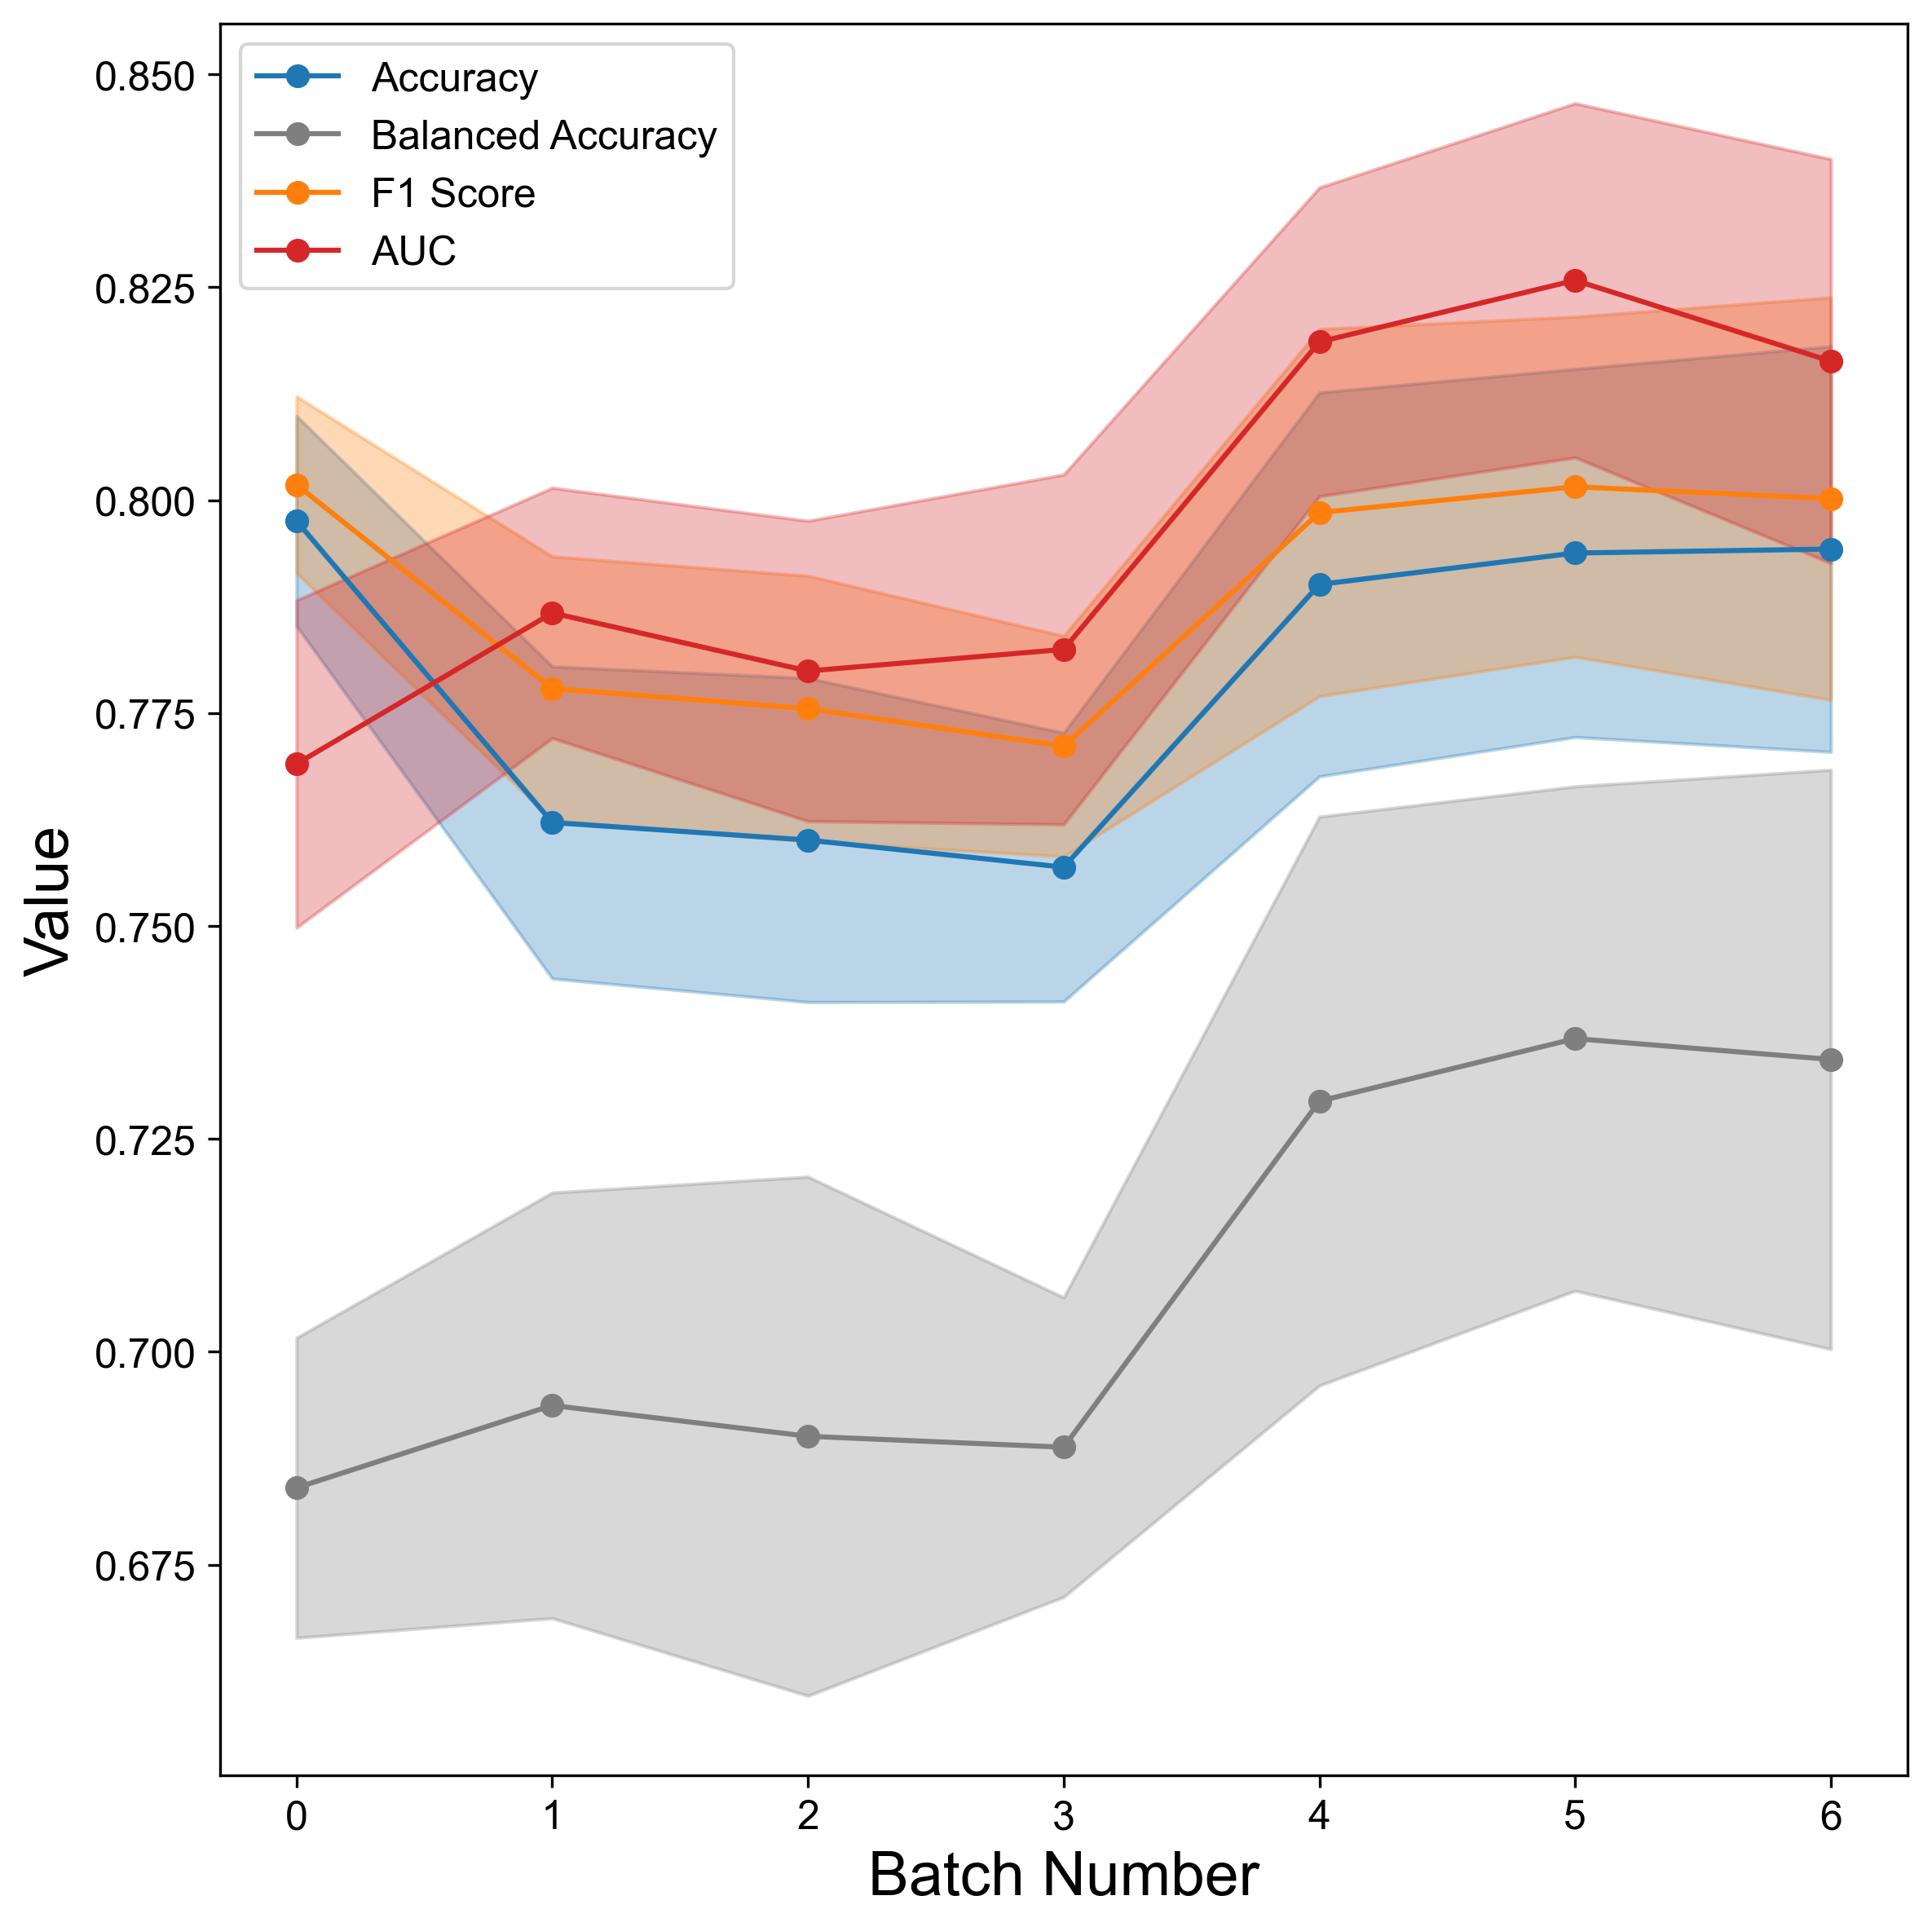

In [10]:
plt.figure(figsize=(8, 8), dpi = 300)
label = ["Accuracy", "Balanced Accuracy", "F1 Score", "AUC"]
colors = ['tab:blue', 'tab:gray', 'tab:orange', 'tab:red']  # Define your color palette

x = np.arange(100)
for i in range(4):
    mean = mean_value[:, i]
    std = std_value[:, i]
    plt.plot(x, mean, marker = 'o', label=label[i], color=colors[i])
    plt.fill_between(x, mean - std, mean + std, alpha=0.3, color=colors[i])

plt.xlabel('Batch Number',fontsize = 18)
plt.ylabel('Value', fontsize = 18)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.legend(fontsize = 12, loc='upper left')
plt.tight_layout()
plt.savefig("./overall.png", dpi = 300)
plt.show()